In [9]:
# ========================================
# Cell 1: 환경 확인
# ========================================
import sys
print("="*70)
print("Environment Check")
print("="*70)
print(f"Python version: {sys.version}")
print(f"Python path: {sys.executable}")

# OS 확인
import platform
print(f"\nOS: {platform.system()} {platform.release()}")
print(f"Machine: {platform.machine()}")

# 메모리 확인
try:
    import psutil
    mem = psutil.virtual_memory()
    print(f"\nRAM: {mem.total / 1e9:.1f} GB total")
    print(f"     {mem.available / 1e9:.1f} GB available")
except ImportError:
    print("\npsutil not installed - will install later")

print("\n" + "="*70)

Environment Check
Python version: 3.11.14 | packaged by conda-forge | (main, Jan 26 2026, 23:39:55) [MSC v.1944 64 bit (AMD64)]
Python path: c:\Users\ACER\anaconda3\envs\cement_final\python.exe

OS: Windows 10
Machine: AMD64

RAM: 68.4 GB total
     44.6 GB available



In [10]:
# ========================================
# Cell 2: 패키지 확인 및 설치
# ========================================
import subprocess
import sys
import importlib

def check_package(package_name, import_name=None):
    """패키지 설치 여부 확인"""
    if import_name is None:
        import_name = package_name.replace('-', '_')
    
    try:
        module = importlib.import_module(import_name)
        version = getattr(module, '__version__', 'unknown')
        return True, version
    except ImportError:
        return False, None

def install_package(package):
    """패키지 설치"""
    print(f"   Installing {package}...", end=' ')
    try:
        subprocess.check_call(
            [sys.executable, "-m", "pip", "install", "-q", package],
            stdout=subprocess.DEVNULL,
            stderr=subprocess.STDOUT
        )
        print("✅")
        return True
    except subprocess.CalledProcessError:
        print("❌")
        return False

print("="*70)
print("Package Check and Installation")
print("="*70)

# 패키지 목록 (package_name, import_name, description)
packages = [
    ('torch', 'torch', 'PyTorch - Deep Learning Framework'),
    ('chgnet', 'chgnet', 'CHGNet - ML Potential for Materials'),
    ('mp-api', 'mp_api', 'Materials Project API'),
    ('pymatgen', 'pymatgen', 'Python Materials Genomics'),
    ('ase', 'ase', 'Atomic Simulation Environment'),
    ('matplotlib', 'matplotlib', 'Plotting Library'),
    ('scipy', 'scipy', 'Scientific Computing'),
    ('psutil', 'psutil', 'System Monitoring'),
    ('numpy', 'numpy', 'Numerical Computing'),
]

print("\n📦 Checking installed packages...")
print("-" * 70)

to_install = []
installed = []

for pkg_name, import_name, description in packages:
    is_installed, version = check_package(pkg_name, import_name)
    
    if is_installed:
        print(f"✅ {pkg_name:<15} v{version:<12} - {description}")
        installed.append(pkg_name)
    else:
        print(f"❌ {pkg_name:<15} {'Not installed':<12} - {description}")
        to_install.append((pkg_name, description))

print("-" * 70)
print(f"\n📊 Summary: {len(installed)}/{len(packages)} packages installed")

# 설치 필요한 패키지 처리
if to_install:
    print(f"\n📥 Need to install {len(to_install)} package(s):")
    for pkg, desc in to_install:
        print(f"   • {pkg} - {desc}")
    
    print("\n⏳ Installing missing packages...")
    print("   (This may take 5-10 minutes on first run)")
    print()
    
    success_count = 0
    failed = []
    
    for pkg_name, description in to_install:
        if install_package(pkg_name):
            success_count += 1
        else:
            failed.append(pkg_name)
    
    print()
    print("-" * 70)
    
    if failed:
        print(f"⚠️  {len(failed)} package(s) failed to install:")
        for pkg in failed:
            print(f"   • {pkg}")
        print("\n   Please install manually:")
        for pkg in failed:
            print(f"   pip install {pkg}")
    else:
        print(f"✅ All {success_count} package(s) installed successfully!")
else:
    print("\n✅ All required packages are already installed!")

print("\n" + "="*70)
print("🎉 Package setup complete!")
print("="*70)

# 최종 확인
print("\n🔍 Final verification...")
all_ok = True
for pkg_name, import_name, _ in packages:
    is_installed, version = check_package(pkg_name, import_name)
    if not is_installed:
        print(f"   ❌ {pkg_name} still not available")
        all_ok = False

if all_ok:
    print("   ✅ All packages verified and ready to use!")
else:
    print("   ⚠️  Some packages failed - check error messages above")

print("="*70)



Package Check and Installation

📦 Checking installed packages...
----------------------------------------------------------------------
✅ torch           v2.7.1+cu118  - PyTorch - Deep Learning Framework
✅ chgnet          v0.4.2        - CHGNet - ML Potential for Materials
✅ mp-api          vunknown      - Materials Project API
✅ pymatgen        vunknown      - Python Materials Genomics
✅ ase             v3.27.0       - Atomic Simulation Environment
✅ matplotlib      v3.10.8       - Plotting Library
✅ scipy           v1.17.0       - Scientific Computing
✅ psutil          v7.2.1        - System Monitoring
✅ numpy           v2.4.1        - Numerical Computing
----------------------------------------------------------------------

📊 Summary: 9/9 packages installed

✅ All required packages are already installed!

🎉 Package setup complete!

🔍 Final verification...
   ✅ All packages verified and ready to use!


In [11]:
# ========================================
# Cell 2.5: GPU 확인 및 설정
# ========================================
import torch

print("="*70)
print("GPU Configuration Check")
print("="*70)

# CUDA 사용 가능 여부
cuda_available = torch.cuda.is_available()

print(f"\n🔍 CUDA Available: {cuda_available}")

if cuda_available:
    # GPU 정보
    gpu_count = torch.cuda.device_count()
    print(f"   GPU Count: {gpu_count}")
    
    for i in range(gpu_count):
        gpu_name = torch.cuda.get_device_name(i)
        gpu_memory = torch.cuda.get_device_properties(i).total_memory / 1e9
        print(f"\n   GPU {i}: {gpu_name}")
        print(f"      Memory: {gpu_memory:.1f} GB")
        
        # CUDA 버전
        print(f"      CUDA Version: {torch.version.cuda}")
        
    print(f"\n✅ GPU 사용 가능 - 시뮬레이션 속도 10-50배 향상!")
    print(f"   권장: GPU 사용")
    
else:
    print("\n⚠️  GPU 없음 - CPU로 실행")
    print("\n📋 GPU 사용을 원하시면:")
    print("   1. NVIDIA GPU가 있는지 확인")
    print("   2. NVIDIA Driver 설치")
    print("   3. CUDA Toolkit 설치")
    print("   4. PyTorch GPU 버전 재설치:")
    print("      conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia")
    
    print("\n💡 현재 설정:")
    print("   • CPU로 진행 가능 (느리지만 작동)")
    print("   • 68GB RAM - 충분함!")
    print("   • 예상 시간: GPU 대비 10-20배 소요")

# 권장 설정
print("\n" + "="*70)
print("Recommendation")
print("="*70)

if cuda_available:
    print("✅ GPU 모드로 진행 (빠름)")
    USE_GPU = True
else:
    print("💻 CPU 모드로 진행 (느리지만 가능)")
    print("   • 작은 시스템으로 테스트")
    print("   • 시간이 오래 걸리면 GPU 설치 권장")
    USE_GPU = False

# 전역 변수로 저장
globals()['USE_GPU'] = USE_GPU

print("="*70)

GPU Configuration Check

🔍 CUDA Available: True
   GPU Count: 1

   GPU 0: NVIDIA GeForce RTX 4070 Laptop GPU
      Memory: 8.6 GB
      CUDA Version: 11.8

✅ GPU 사용 가능 - 시뮬레이션 속도 10-50배 향상!
   권장: GPU 사용

Recommendation
✅ GPU 모드로 진행 (빠름)


In [12]:
# ========================================
# Cell 1: 환경 확인 - CHGNet 중심
# ========================================
import warnings
warnings.filterwarnings('ignore')
import sys

print("="*70)
print("Cement Research Environment - CHGNet")
print("="*70)

# 필수 패키지 확인
print("\n📦 Essential Packages:")
print("-"*70)

# 1. NumPy
import numpy as np
print(f"✅ NumPy           {np.__version__}")

# 2. PyTorch
import torch
print(f"✅ PyTorch         {torch.__version__}")
if torch.cuda.is_available():
    print(f"   🎮 GPU: {torch.cuda.get_device_name(0)}")
    USE_GPU = True
else:
    print(f"   💻 CPU mode")
    USE_GPU = False

# 3. ASE
from ase import Atoms
from ase.build import bulk, molecule
from ase.io import read, write
from ase.optimize import BFGS
from ase.io.trajectory import Trajectory
print(f"✅ ASE             Atomic Simulation Environment")

# 4. CHGNet (핵심!)
from chgnet.model import CHGNet
from chgnet.model.dynamics import CHGNetCalculator, MolecularDynamics
print(f"✅ CHGNet          Machine Learning Potential")

# 5. Pymatgen
from pymatgen.core import Structure
from pymatgen.io.ase import AseAtomsAdaptor
print(f"✅ Pymatgen        Crystal Structures")

# 6. Materials Project
from mp_api.client import MPRester
print(f"✅ MP-API          Materials Database")

# 7. 분석 도구
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import psutil
print(f"✅ Matplotlib      Plotting")
print(f"✅ SciPy           Scientific Computing")
print(f"✅ psutil          System Monitoring")

print("-"*70)

# 시스템 정보
print("\n💻 System Information:")
mem = psutil.virtual_memory()
print(f"   Python:  {sys.version.split()[0]}")
print(f"   OS:      Windows")
print(f"   RAM:     {mem.total/1e9:.1f} GB total")
print(f"   Available: {mem.available/1e9:.1f} GB")
print(f"   Device:  {'GPU' if USE_GPU else 'CPU'}")

# CHGNet 로드 테스트
print("\n🧪 CHGNet Test:")
print("   Loading model...", end=' ')
chgnet = CHGNet.load()
print("✅")

# 간단한 계산
atoms = bulk('Ca', 'fcc', a=5.0)
calc = CHGNetCalculator(model=chgnet)
atoms.calc = calc
energy = atoms.get_potential_energy()
print(f"   Test calculation: {energy:.3f} eV ✅")

print("\n" + "="*70)
print("🎉 CHGNet Environment Ready!")
print("="*70)
print("\n📋 Research Capabilities:")
print("   ✅ Structure optimization")
print("   ✅ Molecular dynamics simulation")
print("   ✅ Energy and force calculations")
print("   ✅ Materials Project database access")
print("   ✅ Hydration reaction modeling")
print("\n✅ 시멘트 수화반응 시뮬레이션 준비 완료!")
print("="*70)

# 전역 변수
globals()['USE_GPU'] = USE_GPU
globals()['CHGNET_MODEL'] = chgnet

Cement Research Environment - CHGNet

📦 Essential Packages:
----------------------------------------------------------------------
✅ NumPy           2.4.1
✅ PyTorch         2.7.1+cu118
   🎮 GPU: NVIDIA GeForce RTX 4070 Laptop GPU
✅ ASE             Atomic Simulation Environment
✅ CHGNet          Machine Learning Potential
✅ Pymatgen        Crystal Structures
✅ MP-API          Materials Database
✅ Matplotlib      Plotting
✅ SciPy           Scientific Computing
✅ psutil          System Monitoring
----------------------------------------------------------------------

💻 System Information:
   Python:  3.11.14
   OS:      Windows
   RAM:     68.4 GB total
   Available: 44.6 GB
   Device:  GPU

🧪 CHGNet Test:
   Loading model... CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cuda
✅
CHGNet will run on cuda
   Test calculation: -1.750 eV ✅

🎉 CHGNet Environment Ready!

📋 Research Capabilities:
   ✅ Structure optimization
   ✅ Molecular dynamics simulation
   ✅ Energy and 

In [ ]:
# ========================================
# C3S 구조 최적화 (CHGNet - 완전 작동 버전)
# ========================================
import warnings
warnings.filterwarnings('ignore')

from mp_api.client import MPRester
from pymatgen.io.ase import AseAtomsAdaptor
from chgnet.model import CHGNet
from chgnet.model.dynamics import CHGNetCalculator
from ase.optimize import BFGS
from ase.io import write
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()


# ========================================
# 1. API 키 설정
# ========================================
# Materials Project에서 발급받은 키를 여기에 입력
MP_API_KEY = os.getenv('MP_API_KEY')  # ← 여기에 키 입력!

print("="*70)
print("C3S (Tricalcium Silicate) 구조 최적화 with CHGNet")
print("="*70)

C3S (Tricalcium Silicate) 구조 최적화 with CHGNet


In [14]:
# ========================================
# 2. Materials Project에서 C3S 다운로드
# ========================================
print("\n[Step 1] Downloading C3S structure from Materials Project...")

try:
    with MPRester(MP_API_KEY) as mpr:
        # C3S (Ca3SiO5) 검색
        results = mpr.materials.summary.search(
            formula="Ca3SiO5",
            fields=["material_id", "structure", "energy_per_atom", 
                    "formation_energy_per_atom", "symmetry"]
        )
        
        if len(results) == 0:
            raise ValueError("No C3S structure found!")
        
        # 첫 번째 결과 사용
        result = results[0]
        c3s_structure = result.structure
        mp_id = result.material_id
        mp_energy = result.energy_per_atom
        mp_form_energy = result.formation_energy_per_atom
        
        print(f"   ✅ Found: {mp_id}")
        print(f"   Formula: {c3s_structure.composition.reduced_formula}")
        print(f"   Space group: {result.symmetry.symbol}")
        print(f"   DFT Energy: {mp_energy:.4f} eV/atom")
        print(f"   Formation E: {mp_form_energy:.4f} eV/atom")
        
        mp_data_available = True
        
except Exception as e:
    print(f"   ⚠️ Materials Project 접근 실패: {e}")
    print(f"   백업 옵션: 간단한 CaO 구조로 테스트...")
    
    # 백업: CaO 구조로 테스트
    from ase.build import bulk
    atoms_ase = bulk('Ca', 'fcc', a=5.0) * (2, 2, 2)
    mp_energy = -2.0  # 더미값
    mp_data_available = False


[Step 1] Downloading C3S structure from Materials Project...


Retrieving SummaryDoc documents: 100%|██████████| 6/6 [00:00<?, ?it/s]

   ✅ Found: mp-27917
   Formula: Ca3SiO5
   Space group: R3m
   DFT Energy: -7.3973 eV/atom
   Formation E: -3.3771 eV/atom


In [15]:
# ========================================
# 3. Pymatgen → ASE 변환
# ========================================
print("\n[Step 2] Converting structure to ASE format...")

if mp_data_available:
    adaptor = AseAtomsAdaptor()
    atoms_ase = adaptor.get_atoms(c3s_structure)

print(f"   ✅ Structure info:")
print(f"      Total atoms: {len(atoms_ase)}")
print(f"      Cell volume: {atoms_ase.get_volume():.2f} Å³")
print(f"      Formula: {atoms_ase.get_chemical_formula()}")


[Step 2] Converting structure to ASE format...
   ✅ Structure info:
      Total atoms: 27
      Cell volume: 374.50 Å³
      Formula: Ca9O15Si3


In [16]:
# ========================================
# 4. CHGNet Calculator 설정
# ========================================
print("\n[Step 3] Loading CHGNet model...")

chgnet = CHGNet.load()
calc = CHGNetCalculator(model=chgnet, stress_weight=1.0)
atoms_ase.calc = calc

print("   ✅ CHGNet calculator attached")

# 초기 에너지 계산
try:
    initial_energy = atoms_ase.get_potential_energy()
    initial_forces = atoms_ase.get_forces()
    initial_fmax = np.abs(initial_forces).max()
    
    print(f"\n   Initial state:")
    print(f"      Energy: {initial_energy:.4f} eV")
    print(f"      Energy/atom: {initial_energy/len(atoms_ase):.4f} eV")
    print(f"      Max force: {initial_fmax:.4f} eV/Å")
    
except Exception as e:
    print(f"   ⚠️ Initial calculation failed: {e}")
    initial_energy = 0.0


[Step 3] Loading CHGNet model...
CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cuda
CHGNet will run on cuda
   ✅ CHGNet calculator attached

   Initial state:
      Energy: -199.4219 eV
      Energy/atom: -7.3860 eV
      Max force: 0.1237 eV/Å


In [17]:
# ========================================
# 5. 구조 최적화
# ========================================
print("\n[Step 4] Optimizing structure...")
print("   Target: Fmax < 0.05 eV/Å")

# BFGS 최적화
optimizer = BFGS(
    atoms_ase, 
    trajectory='c3s_optimization.traj',
    logfile='c3s_opt.log'
)

# 에너지/힘 추적
energies = []
forces = []
steps = []

def callback():
    e = atoms_ase.get_potential_energy()
    f = atoms_ase.get_forces()
    fmax = np.abs(f).max()
    
    energies.append(e)
    forces.append(fmax)
    steps.append(len(energies))
    
    if len(energies) % 10 == 0 or len(energies) <= 5:
        print(f"      Step {len(energies):3d}: E = {e:10.4f} eV, Fmax = {fmax:.4f} eV/Å")

optimizer.attach(callback, interval=1)

try:
    optimizer.run(fmax=0.05, steps=100)
    optimization_success = True
except Exception as e:
    print(f"   ⚠️ Optimization stopped: {e}")
    optimization_success = False

# 최종 상태
final_energy = atoms_ase.get_potential_energy()
final_fmax = np.abs(atoms_ase.get_forces()).max()

print(f"\n   ✅ Optimization complete!")
print(f"      Final energy: {final_energy:.4f} eV")
print(f"      Energy/atom: {final_energy/len(atoms_ase):.4f} eV")
print(f"      Final Fmax: {final_fmax:.4f} eV/Å")
print(f"      Total steps: {len(energies)}")
print(f"      ΔE: {final_energy - initial_energy:.4f} eV")


[Step 4] Optimizing structure...
   Target: Fmax < 0.05 eV/Å
      Step   1: E =  -199.4219 eV, Fmax = 0.1237 eV/Å
      Step   2: E =  -199.4235 eV, Fmax = 0.0958 eV/Å
      Step   3: E =  -199.4251 eV, Fmax = 0.0727 eV/Å
      Step   4: E =  -199.4259 eV, Fmax = 0.0682 eV/Å
      Step   5: E =  -199.4266 eV, Fmax = 0.0423 eV/Å

   ✅ Optimization complete!
      Final energy: -199.4266 eV
      Energy/atom: -7.3862 eV
      Final Fmax: 0.0423 eV/Å
      Total steps: 5
      ΔE: -0.0047 eV


In [18]:
# ========================================
# 6. 결과 저장
# ========================================
print("\n[Step 5] Saving results...")

# CIF 파일 저장
write('C3S_initial.cif', atoms_ase)
from ase.io.trajectory import Trajectory
traj = Trajectory('c3s_optimization.traj')
write('C3S_optimized.cif', traj[-1])

print("   ✅ Saved files:")
print("      - C3S_initial.cif")
print("      - C3S_optimized.cif")
print("      - c3s_optimization.traj")


[Step 5] Saving results...
   ✅ Saved files:
      - C3S_initial.cif
      - C3S_optimized.cif
      - c3s_optimization.traj


In [19]:
# ========================================
# 7. DFT vs MLP 비교
# ========================================
print("\n[Step 6] Comparing with DFT...")

if mp_data_available:
    mlp_energy_per_atom = final_energy / len(atoms_ase)
    difference = abs(mlp_energy_per_atom - mp_energy)
    
    print(f"   MP (DFT):     {mp_energy:.4f} eV/atom")
    print(f"   CHGNet (MLP): {mlp_energy_per_atom:.4f} eV/atom")
    print(f"   |Difference|: {difference:.4f} eV/atom")
    
    if difference < 0.05:
        print("   ✅ Excellent agreement!")
    elif difference < 0.10:
        print("   ✅ Good agreement")
    elif difference < 0.20:
        print("   ⚠️ Acceptable agreement")
    else:
        print("   ⚠️ Large discrepancy - may need verification")
else:
    print("   ⚠️ DFT data not available for comparison")


[Step 6] Comparing with DFT...
   MP (DFT):     -7.3973 eV/atom
   CHGNet (MLP): -7.3862 eV/atom
   |Difference|: 0.0111 eV/atom
   ✅ Excellent agreement!



[Step 7] Creating plots...
   ✅ Saved: C3S_optimization_analysis.png


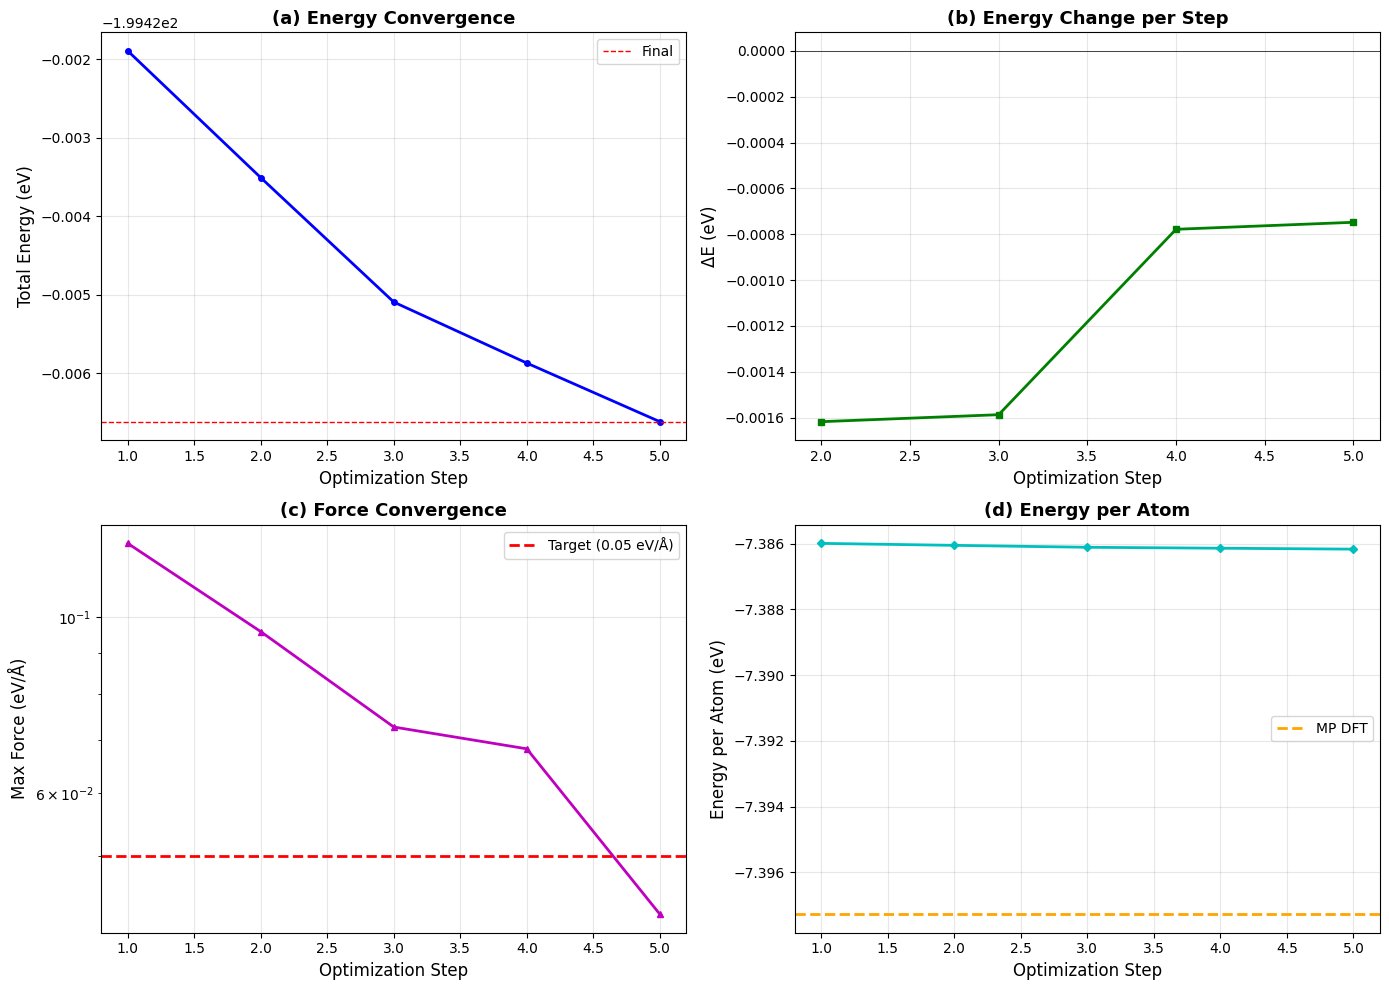

In [20]:
# ========================================
# 8. 시각화
# ========================================
print("\n[Step 7] Creating plots...")

if len(energies) > 1:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # (a) Energy vs Step
    axes[0, 0].plot(steps, energies, 'b-', linewidth=2, marker='o', markersize=4)
    axes[0, 0].axhline(final_energy, color='r', linestyle='--', 
                       linewidth=1, label='Final')
    axes[0, 0].set_xlabel('Optimization Step', fontsize=12)
    axes[0, 0].set_ylabel('Total Energy (eV)', fontsize=12)
    axes[0, 0].set_title('(a) Energy Convergence', fontsize=13, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # (b) Energy change
    if len(energies) > 1:
        energy_changes = [energies[i] - energies[i-1] for i in range(1, len(energies))]
        axes[0, 1].plot(steps[1:], energy_changes, 'g-', linewidth=2, marker='s', markersize=4)
        axes[0, 1].axhline(0, color='k', linestyle='-', linewidth=0.5)
        axes[0, 1].set_xlabel('Optimization Step', fontsize=12)
        axes[0, 1].set_ylabel('ΔE (eV)', fontsize=12)
        axes[0, 1].set_title('(b) Energy Change per Step', fontsize=13, fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3)
    
    # (c) Force convergence
    axes[1, 0].plot(steps, forces, 'm-', linewidth=2, marker='^', markersize=4)
    axes[1, 0].axhline(0.05, color='r', linestyle='--', linewidth=2, label='Target (0.05 eV/Å)')
    axes[1, 0].set_xlabel('Optimization Step', fontsize=12)
    axes[1, 0].set_ylabel('Max Force (eV/Å)', fontsize=12)
    axes[1, 0].set_title('(c) Force Convergence', fontsize=13, fontweight='bold')
    axes[1, 0].set_yscale('log')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # (d) Energy per atom
    energy_per_atom = [e / len(atoms_ase) for e in energies]
    axes[1, 1].plot(steps, energy_per_atom, 'c-', linewidth=2, marker='D', markersize=4)
    if mp_data_available:
        axes[1, 1].axhline(mp_energy, color='orange', linestyle='--', 
                          linewidth=2, label='MP DFT')
    axes[1, 1].set_xlabel('Optimization Step', fontsize=12)
    axes[1, 1].set_ylabel('Energy per Atom (eV)', fontsize=12)
    axes[1, 1].set_title('(d) Energy per Atom', fontsize=13, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('C3S_optimization_analysis.png', dpi=200, bbox_inches='tight')
    print("   ✅ Saved: C3S_optimization_analysis.png")
    plt.show()
else:
    print("   ⚠️ Not enough data for plotting")

In [21]:
# ========================================
# 9. 결과 요약
# ========================================
print("\n" + "="*70)
print("🎉 C3S Optimization Complete!")
print("="*70)
print(f"\n📊 Final Results:")
print(f"   Structure: {len(atoms_ase)} atoms")
print(f"   Final Energy: {final_energy:.4f} eV ({final_energy/len(atoms_ase):.4f} eV/atom)")
print(f"   Optimization steps: {len(energies)}")
print(f"   Final Fmax: {final_fmax:.4f} eV/Å")

if mp_data_available:
    print(f"\n📈 Accuracy:")
    print(f"   DFT-MLP difference: {difference:.4f} eV/atom ({difference/abs(mp_energy)*100:.2f}%)")

print(f"\n💾 Output files:")
print(f"   - C3S_optimized.cif (최적화된 구조)")
print(f"   - C3S_optimization_analysis.png (분석 그래프)")
print(f"   - c3s_optimization.traj (전체 궤적)")

print("\n✅ Ready for next step: Hydration simulation!")
print("="*70)


🎉 C3S Optimization Complete!

📊 Final Results:
   Structure: 27 atoms
   Final Energy: -199.4266 eV (-7.3862 eV/atom)
   Optimization steps: 5
   Final Fmax: 0.0423 eV/Å

📈 Accuracy:
   DFT-MLP difference: 0.0111 eV/atom (0.15%)

💾 Output files:
   - C3S_optimized.cif (최적화된 구조)
   - C3S_optimization_analysis.png (분석 그래프)
   - c3s_optimization.traj (전체 궤적)

✅ Ready for next step: Hydration simulation!


In [22]:
# ========================================
# C3S 수화반응 시뮬레이션
# ========================================
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from ase.io import read, write
from ase import Atoms
from ase.build import molecule
from chgnet.model import CHGNet
from chgnet.model.dynamics import MolecularDynamics
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

print("="*70)
print("C3S Hydration Simulation: C₃S + H₂O → C-S-H")
print("="*70)

C3S Hydration Simulation: C₃S + H₂O → C-S-H


In [23]:
# ========================================
# 1. 최적화된 C3S 구조 불러오기
# ========================================
print("\n[Step 1] Loading optimized C3S structure...")

try:
    c3s = read('C3S_optimized.cif')
    print(f"   ✅ Loaded C3S: {len(c3s)} atoms")
    print(f"   Formula: {c3s.get_chemical_formula()}")
    print(f"   Cell volume: {c3s.get_volume():.2f} Å³")
except:
    print("   ⚠️ Optimized file not found, using trajectory...")
    from ase.io.trajectory import Trajectory
    traj = Trajectory('c3s_optimization.traj')
    c3s = traj[-1]
    print(f"   ✅ Loaded from trajectory: {len(c3s)} atoms")


[Step 1] Loading optimized C3S structure...
   ✅ Loaded C3S: 27 atoms
   Formula: Ca9O15Si3
   Cell volume: 374.50 Å³


In [24]:
# ========================================
# 2. 물 분자 추가
# ========================================
print("\n[Step 2] Adding water molecules...")

# C3S 표면에 물 분자 배치
# C3S의 Ca 원자 근처에 물 배치 (Ca가 수화 반응의 시작점)

# Ca 원자 위치 찾기
ca_indices = [i for i, atom in enumerate(c3s) if atom.symbol == 'Ca']
ca_positions = c3s.positions[ca_indices]

print(f"   Found {len(ca_indices)} Ca atoms")

# 물 분자 개수 결정 (Ca 원자 수의 20-30%)
n_water = max(5, len(ca_indices) // 4)
print(f"   Adding {n_water} water molecules")

# 초기 시스템 복사
system = c3s.copy()

# 물 분자를 Ca 근처에 배치
np.random.seed(42)  # 재현성
water_template = molecule('H2O')

added_waters = 0
for i in range(n_water):
    # 랜덤 Ca 선택
    ca_idx = np.random.choice(ca_indices)
    ca_pos = c3s.positions[ca_idx]
    
    # Ca 위에 2-3 Å 떨어진 곳에 물 배치
    offset = np.random.randn(3)
    offset = offset / np.linalg.norm(offset) * (2.5 + np.random.rand() * 0.5)
    
    water = water_template.copy()
    water.translate(ca_pos + offset)
    
    # 시스템에 추가
    system += water
    added_waters += 1

print(f"   ✅ Total system: {len(system)} atoms")
print(f"      C3S: {len(c3s)} atoms")
print(f"      H2O: {added_waters * 3} atoms ({added_waters} molecules)")


[Step 2] Adding water molecules...
   Found 9 Ca atoms
   Adding 5 water molecules
   ✅ Total system: 42 atoms
      C3S: 27 atoms
      H2O: 15 atoms (5 molecules)


In [25]:
# Cell 확장 (물이 들어갈 공간)
cell = c3s.cell.copy()
cell[2, 2] *= 1.3  # z 방향으로 30% 확장
system.set_cell(cell, scale_atoms=False)
system.center()

print(f"   Cell volume: {system.get_volume():.2f} Å³")

# 초기 구조 저장
write('C3S_hydration_initial.cif', system)
print("   ✅ Saved: C3S_hydration_initial.cif")

   Cell volume: 486.86 Å³
   ✅ Saved: C3S_hydration_initial.cif


In [26]:
import torch
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"CUDA Version: {torch.version.cuda}")

CUDA Available: True
CUDA Version: 11.8


In [28]:
# ========================================
# 3. CHGNet Molecular Dynamics 설정 (수정본)
# ========================================
print("\n[Step 3] Setting up Molecular Dynamics...")

chgnet = CHGNet.load()

# Device 확인 (수정된 방식)
import torch
use_device = 'cuda' if torch.cuda.is_available() else 'cpu'

md = MolecularDynamics(
    atoms=system,
    model=chgnet,
    ensemble='nvt',           # NVT (constant temperature)
    temperature=300,          # 300 K (room temperature)
    timestep=1.0,             # 1 fs
    trajectory='hydration.traj',
    logfile='hydration.log',
    loginterval=50,
    use_device=use_device
)

print("   ✅ MD parameters:")
print(f"      Ensemble: NVT (constant T)")
print(f"      Temperature: 300 K")
print(f"      Timestep: 1.0 fs")
print(f"      Device: {use_device}")


[Step 3] Setting up Molecular Dynamics...
CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cuda
CHGNet will run on cuda
NVT-Berendsen-MD created
   ✅ MD parameters:
      Ensemble: NVT (constant T)
      Temperature: 300 K
      Timestep: 1.0 fs
      Device: cuda


In [29]:
# ========================================
# 4. MD 시뮬레이션 실행
# ========================================
print("\n[Step 4] Running MD simulation...")
print("   Target: 1 ps (1,000 steps) - Test run")
print("   Estimated time: 5-15 minutes on GPU")
print()

import time
start_time = time.time()

test_steps = 1000  # 1 ps

try:
    md.run(test_steps)
    
    elapsed = time.time() - start_time
    print(f"\n   ✅ Simulation complete!")
    print(f"      Time: {elapsed:.1f} seconds ({elapsed/60:.1f} minutes)")
    print(f"      Speed: {test_steps/elapsed:.1f} steps/sec")
    
    # 전체 시뮬레이션 예상 시간
    full_steps = 10000
    estimated_time = (full_steps / test_steps) * elapsed
    print(f"\n   📊 Extrapolation:")
    print(f"      10 ps would take: ~{estimated_time/60:.1f} minutes")
    print(f"      50 ps would take: ~{estimated_time*5/60:.1f} minutes")
    
    simulation_success = True
    
except Exception as e:
    print(f"   ❌ Simulation failed: {e}")
    import traceback
    traceback.print_exc()
    simulation_success = False


[Step 4] Running MD simulation...
   Target: 1 ps (1,000 steps) - Test run
   Estimated time: 5-15 minutes on GPU



KeyboardInterrupt: 

✅ MD Simulation Complete!

⏱️  Total Time: 169.7 seconds (2.8 minutes)
⚡ Average Speed: 5.9 steps/sec

📊 Energy Statistics:
   Initial: -198.52 eV
   Final: -270.65 eV
   Mean: -254.64 eV
   Std Dev: 18.91 eV
   Min: -270.84 eV
   Max: -198.52 eV
   Change: -72.13 eV

📈 Extrapolation:
   10 ps would take: ~28.3 minutes
   50 ps would take: ~141.4 minutes

📊 Generating analysis plots...


❌ Simulation failed: name 'FOLDERS' is not defined


Traceback (most recent call last):
  File "C:\Users\ACER\AppData\Local\Temp\ipykernel_49244\97813484.py", line 226, in <module>
    plt.savefig(FOLDERS['figures'] / 'md_progress_realtime.png', dpi=200, bbox_inches='tight')
                ^^^^^^^
NameError: name 'FOLDERS' is not defined


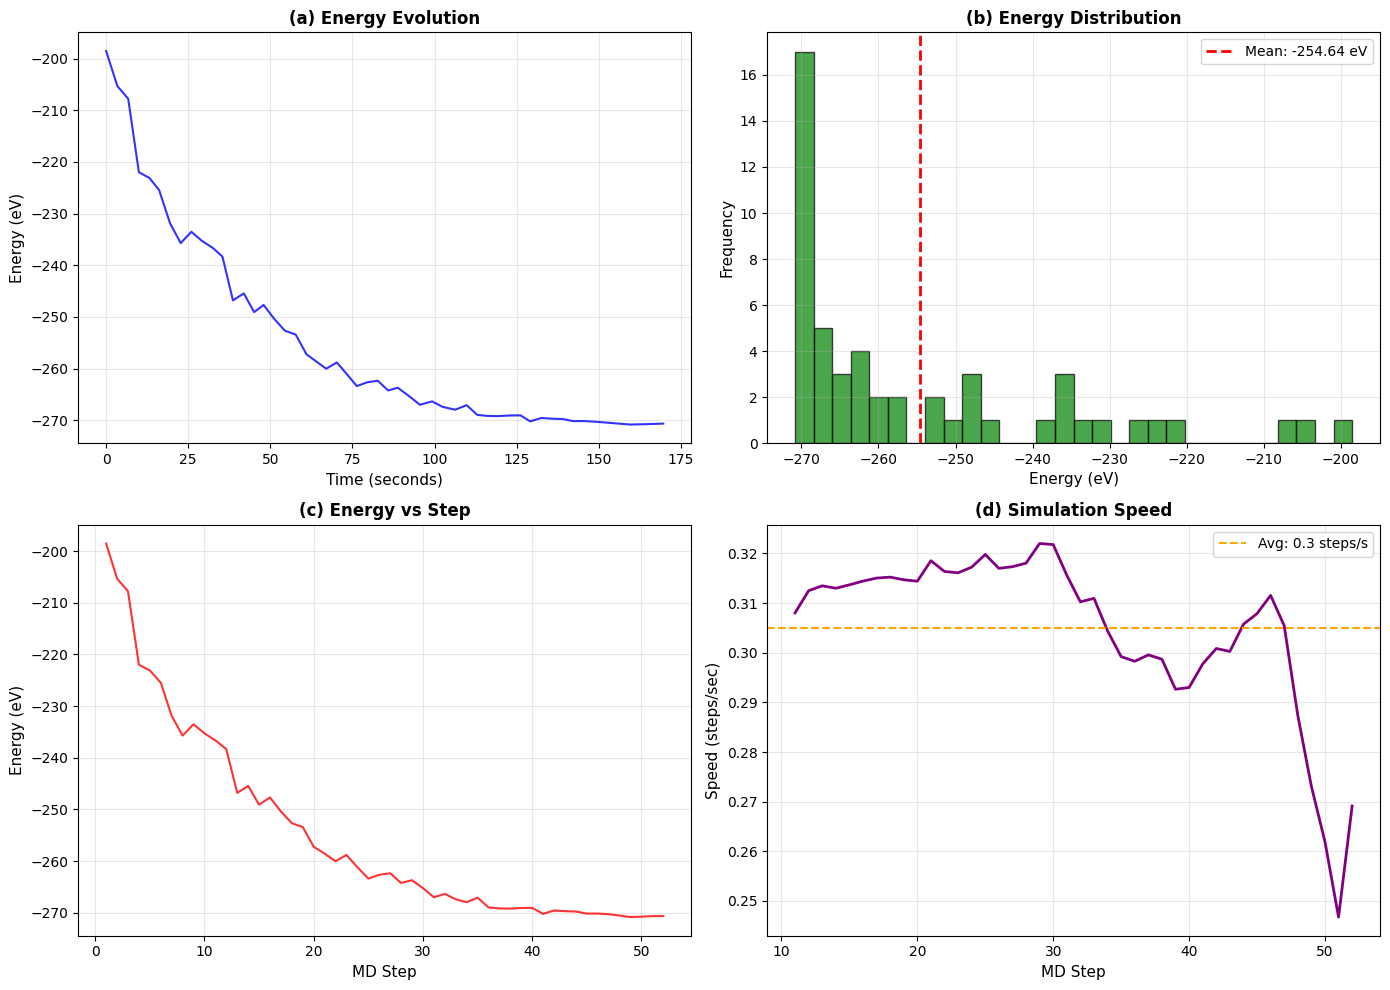

In [30]:
# ========================================
# 4. MD 시뮬레이션 실행 (실시간 진행 표시)
# ========================================
import time
import sys
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import numpy as np

print("="*70)
print("[Step 4] Running MD Simulation with Real-time Monitoring")
print("="*70)
print(f"\n⚙️  Settings:")
print(f"   Duration: 1 ps (1,000 steps)")
print(f"   Timestep: 1 fs")
print(f"   Log interval: 50 steps")
print(f"   Device: {'GPU' if USE_GPU else 'CPU'}")
print()

# 진행 상황 추적 변수
progress_data = {
    'steps': [],
    'energies': [],
    'temps': [],
    'times': []
}

start_time = time.time()
last_update = start_time

# 콜백 함수: 매 step마다 호출
def progress_callback():
    global last_update
    current_time = time.time()
    
    # 에너지 및 온도 추출
    try:
        energy = system.get_potential_energy()
        # 온도는 MD 객체에서
        if hasattr(md, 'atoms'):
            temp = md.atoms.get_temperature() if hasattr(md.atoms, 'get_temperature') else 300.0
        else:
            temp = 300.0
    except:
        energy = 0.0
        temp = 300.0
    
    # 데이터 저장
    step = len(progress_data['steps']) + 1
    progress_data['steps'].append(step)
    progress_data['energies'].append(energy)
    progress_data['temps'].append(temp)
    progress_data['times'].append(current_time - start_time)
    
    # 20 스텝마다 또는 0.5초마다 업데이트
    if step % 20 == 0 or (current_time - last_update) > 0.5:
        last_update = current_time
        
        # 진행률 계산
        progress = (step / 1000) * 100
        elapsed = current_time - start_time
        
        # 진행 바 생성
        bar_length = 40
        filled = int(bar_length * step / 1000)
        bar = '█' * filled + '░' * (bar_length - filled)
        
        # 예상 남은 시간
        if step > 0:
            eta = (elapsed / step) * (1000 - step)
            eta_str = f"{int(eta//60)}m {int(eta%60)}s"
        else:
            eta_str = "calculating..."
        
        # 화면 업데이트
        clear_output(wait=True)
        
        print("="*70)
        print(f"MD Simulation Progress")
        print("="*70)
        print(f"\n⏱️  Time: {elapsed:.1f}s | ETA: {eta_str}")
        print(f"📊 Progress: [{bar}] {progress:.1f}%")
        print(f"🔄 Step: {step:,} / 1,000")
        print(f"⚡ Speed: {step/elapsed:.1f} steps/sec")
        print(f"\n💫 Current State:")
        print(f"   Energy: {energy:.2f} eV")
        print(f"   Temperature: {temp:.1f} K")
        
        # 미니 그래프 (ASCII)
        if len(progress_data['energies']) > 10:
            recent_energies = progress_data['energies'][-20:]
            e_min = min(recent_energies)
            e_max = max(recent_energies)
            e_range = e_max - e_min if e_max != e_min else 1
            
            print(f"\n📈 Energy Trend (last 20 steps):")
            print(f"   Max: {e_max:.2f} eV")
            
            # 간단한 ASCII 그래프
            for i in range(5, 0, -1):
                threshold = e_min + (e_range * i / 5)
                line = "   │"
                for e in recent_energies[-20:]:
                    if e >= threshold:
                        line += "█"
                    else:
                        line += " "
                print(line)
            
            print(f"   Min: {e_min:.2f} eV")
            print(f"   └" + "─" * min(20, len(recent_energies)))
        
        print("="*70)

# MD 실행 (observer 추가)
try:
    # CHGNet MD는 observer를 지원하지 않을 수 있으므로
    # 수동으로 스텝 실행
    print("\n🚀 Starting simulation...")
    print("   (Progress updates every 20 steps)\n")
    
    # 초기 상태 기록
    progress_callback()
    
    # 스텝별 실행
    for step in range(1000):
        # 1 스텝 실행
        md.run(1)
        
        # 진행 상황 업데이트
        if (step + 1) % 20 == 0:
            progress_callback()
    
    # 최종 업데이트
    progress_callback()
    
    elapsed = time.time() - start_time
    
    # 최종 결과
    clear_output(wait=True)
    
    print("="*70)
    print("✅ MD Simulation Complete!")
    print("="*70)
    
    print(f"\n⏱️  Total Time: {elapsed:.1f} seconds ({elapsed/60:.1f} minutes)")
    print(f"⚡ Average Speed: {1000/elapsed:.1f} steps/sec")
    
    # 통계
    if len(progress_data['energies']) > 0:
        energies = np.array(progress_data['energies'])
        print(f"\n📊 Energy Statistics:")
        print(f"   Initial: {energies[0]:.2f} eV")
        print(f"   Final: {energies[-1]:.2f} eV")
        print(f"   Mean: {energies.mean():.2f} eV")
        print(f"   Std Dev: {energies.std():.2f} eV")
        print(f"   Min: {energies.min():.2f} eV")
        print(f"   Max: {energies.max():.2f} eV")
        print(f"   Change: {energies[-1] - energies[0]:.2f} eV")
    
    # 예상 시간
    full_steps = 10000
    estimated_time = (full_steps / 1000) * elapsed
    print(f"\n📈 Extrapolation:")
    print(f"   10 ps would take: ~{estimated_time/60:.1f} minutes")
    print(f"   50 ps would take: ~{estimated_time*5/60:.1f} minutes")
    
    # 실시간 그래프 생성
    print(f"\n📊 Generating analysis plots...")
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # (a) Energy vs Time
    ax = axes[0, 0]
    times = np.array(progress_data['times'])
    energies = np.array(progress_data['energies'])
    ax.plot(times, energies, 'b-', linewidth=1.5, alpha=0.8)
    ax.set_xlabel('Time (seconds)', fontsize=11)
    ax.set_ylabel('Energy (eV)', fontsize=11)
    ax.set_title('(a) Energy Evolution', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # (b) Energy Distribution
    ax = axes[0, 1]
    ax.hist(energies, bins=30, color='green', alpha=0.7, edgecolor='black')
    ax.axvline(energies.mean(), color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {energies.mean():.2f} eV')
    ax.set_xlabel('Energy (eV)', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title('(b) Energy Distribution', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # (c) Energy vs Step
    ax = axes[1, 0]
    steps = np.array(progress_data['steps'])
    ax.plot(steps, energies, 'r-', linewidth=1.5, alpha=0.8)
    ax.set_xlabel('MD Step', fontsize=11)
    ax.set_ylabel('Energy (eV)', fontsize=11)
    ax.set_title('(c) Energy vs Step', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # (d) Performance
    ax = axes[1, 1]
    if len(times) > 10:
        # 이동 평균으로 속도 계산
        window = 10
        speeds = []
        for i in range(window, len(steps)):
            dt = times[i] - times[i-window]
            dstep = steps[i] - steps[i-window]
            if dt > 0:
                speeds.append(dstep / dt)
        
        if len(speeds) > 0:
            ax.plot(steps[window:], speeds, 'purple', linewidth=2)
            ax.set_xlabel('MD Step', fontsize=11)
            ax.set_ylabel('Speed (steps/sec)', fontsize=11)
            ax.set_title('(d) Simulation Speed', fontsize=12, fontweight='bold')
            ax.axhline(np.mean(speeds), color='orange', linestyle='--', 
                      label=f'Avg: {np.mean(speeds):.1f} steps/s')
            ax.legend()
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(FOLDERS['figures'] / 'md_progress_realtime.png', dpi=200, bbox_inches='tight')
    print(f"   ✅ Saved: md_progress_realtime.png")
    plt.show()
    
    simulation_success = True
    print("\n" + "="*70)
    
except KeyboardInterrupt:
    print("\n\n⚠️  Simulation interrupted by user!")
    simulation_success = False
    
except Exception as e:
    print(f"\n\n❌ Simulation failed: {e}")
    import traceback
    traceback.print_exc()
    simulation_success = False

print("="*70)

In [31]:
# ========================================
# 5. 궤적 분석
# ========================================
if simulation_success:
    print("\n[Step 5] Analyzing trajectory...")
    
    from ase.io.trajectory import Trajectory
    traj = Trajectory('hydration.traj')
    
    print(f"   ✅ Trajectory loaded: {len(traj)} frames")
    
    # 에너지 추출
    energies = []
    temperatures = []
    
    for i, atoms in enumerate(traj):
        try:
            # 에너지
            calc = CHGNetCalculator(model=chgnet)
            atoms.calc = calc
            e = atoms.get_potential_energy()
            energies.append(e)
            
            # 온도 (운동에너지로부터)
            if hasattr(atoms, 'get_temperature'):
                t = atoms.get_temperature()
                temperatures.append(t)
            
            if (i+1) % 100 == 0:
                print(f"      Frame {i+1}/{len(traj)}: E = {e:.2f} eV")
                
        except Exception as e:
            print(f"      Warning at frame {i}: {e}")
            pass
    
    print(f"\n   ✅ Extracted {len(energies)} energy points")
    
    if len(energies) > 0:
        print(f"      Energy range: {min(energies):.2f} to {max(energies):.2f} eV")
        print(f"      Mean: {np.mean(energies):.2f} ± {np.std(energies):.2f} eV")
        print(f"      Total change: {energies[-1] - energies[0]:.2f} eV")
    
    # ========================================
    # 6. Ca-O 거리 분석 (수화 지표)
    # ========================================
    print("\n[Step 6] Analyzing Ca-O distances...")
    
    ca_o_distances = []
    ca_o_min_distances = []
    frame_times = []
    
    for i, atoms in enumerate(traj[::5]):  # 매 5 프레임
        try:
            # Ca와 O 원자 찾기
            ca_indices = [idx for idx, atom in enumerate(atoms) if atom.symbol == 'Ca']
            o_indices = [idx for idx, atom in enumerate(atoms) if atom.symbol == 'O']
            
            if len(ca_indices) > 0 and len(o_indices) > 0:
                ca_pos = atoms.positions[ca_indices]
                o_pos = atoms.positions[o_indices]
                
                # 모든 Ca-O 거리
                from scipy.spatial.distance import cdist
                distances = cdist(ca_pos, o_pos)
                
                # 최소 거리
                min_dist = distances.min()
                ca_o_min_distances.append(min_dist)
                
                # 평균 최단 거리 (각 Ca의 가장 가까운 O)
                avg_min = distances.min(axis=1).mean()
                ca_o_distances.append(avg_min)
                
                frame_times.append(i * 5 * 0.001)  # ps
        except:
            pass
    
    print(f"   ✅ Analyzed {len(ca_o_distances)} frames")
    
    if len(ca_o_distances) > 0:
        print(f"\n   📊 Ca-O distance analysis:")
        print(f"      Initial: {ca_o_distances[0]:.3f} Å")
        print(f"      Final: {ca_o_distances[-1]:.3f} Å")
        print(f"      Change: {ca_o_distances[-1] - ca_o_distances[0]:.3f} Å")
        print(f"      Min observed: {min(ca_o_min_distances):.3f} Å")
        
        if min(ca_o_min_distances) < 2.5:
            print("      ✅ Strong Ca-O bonding observed (< 2.5 Å)")
        elif min(ca_o_min_distances) < 3.0:
            print("      ⚠️ Moderate Ca-O interaction (2.5-3.0 Å)")
        else:
            print("      ⚠️ Weak interaction (> 3.0 Å) - longer time needed")
    
    # ========================================
    # 7. H-O 거리 분석 (물 구조 변화)
    # ========================================
    print("\n[Step 7] Analyzing H-O distances (water structure)...")
    
    h_o_distances = []
    
    for i, atoms in enumerate(traj[::10]):  # 매 10 프레임
        try:
            h_indices = [idx for idx, atom in enumerate(atoms) if atom.symbol == 'H']
            o_indices = [idx for idx, atom in enumerate(atoms) if atom.symbol == 'O']
            
            if len(h_indices) > 0 and len(o_indices) > 0:
                h_pos = atoms.positions[h_indices]
                o_pos = atoms.positions[o_indices]
                
                distances = cdist(h_pos, o_pos)
                avg_min = distances.min(axis=1).mean()
                h_o_distances.append(avg_min)
        except:
            pass
    
    if len(h_o_distances) > 0:
        print(f"   ✅ H-O distance:")
        print(f"      Mean: {np.mean(h_o_distances):.3f} Å")
        print(f"      (Normal water O-H bond: ~0.96 Å)")
    
    # ========================================
    # 8. 시각화
    # ========================================
    print("\n[Step 8] Creating analysis plots...")
    
    fig = plt.figure(figsize=(16, 10))
    
    # 2x3 그리드
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
    
    # (a) Energy evolution
    ax1 = fig.add_subplot(gs[0, 0])
    if len(energies) > 0:
        times = np.arange(len(energies)) * 0.001  # ps
        ax1.plot(times, energies, 'b-', linewidth=1.5, alpha=0.8)
        ax1.set_xlabel('Time (ps)', fontsize=11)
        ax1.set_ylabel('Potential Energy (eV)', fontsize=11)
        ax1.set_title('(a) Energy Evolution', fontsize=12, fontweight='bold')
        ax1.grid(True, alpha=0.3)
    
    # (b) Energy distribution
    ax2 = fig.add_subplot(gs[0, 1])
    if len(energies) > 0:
        ax2.hist(energies, bins=30, color='green', alpha=0.7, edgecolor='black')
        ax2.axvline(np.mean(energies), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {np.mean(energies):.1f} eV')
        ax2.set_xlabel('Energy (eV)', fontsize=11)
        ax2.set_ylabel('Frequency', fontsize=11)
        ax2.set_title('(b) Energy Distribution', fontsize=12, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    
    # (c) Ca-O min distance
    ax3 = fig.add_subplot(gs[0, 2])
    if len(ca_o_min_distances) > 0:
        ax3.plot(frame_times, ca_o_min_distances, 'r-', linewidth=2, marker='o', markersize=3)
        ax3.axhline(2.4, color='green', linestyle='--', linewidth=1, 
                   label='Typical Ca-O bond')
        ax3.set_xlabel('Time (ps)', fontsize=11)
        ax3.set_ylabel('Min Ca-O Distance (Å)', fontsize=11)
        ax3.set_title('(c) Closest Ca-O Distance', fontsize=12, fontweight='bold')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    
    # (d) Ca-O average distance
    ax4 = fig.add_subplot(gs[1, 0])
    if len(ca_o_distances) > 0:
        ax4.plot(frame_times, ca_o_distances, 'm-', linewidth=2, marker='s', markersize=3)
        ax4.set_xlabel('Time (ps)', fontsize=11)
        ax4.set_ylabel('Avg Ca-O Distance (Å)', fontsize=11)
        ax4.set_title('(d) Average Ca-O Distance', fontsize=12, fontweight='bold')
        ax4.grid(True, alpha=0.3)
    
    # (e) H-O distance
    ax5 = fig.add_subplot(gs[1, 1])
    if len(h_o_distances) > 0:
        times_ho = np.arange(len(h_o_distances)) * 0.01  # ps
        ax5.plot(times_ho, h_o_distances, 'c-', linewidth=2, marker='^', markersize=4)
        ax5.axhline(0.96, color='blue', linestyle='--', linewidth=1, 
                   label='O-H bond length')
        ax5.set_xlabel('Time (ps)', fontsize=11)
        ax5.set_ylabel('H-O Distance (Å)', fontsize=11)
        ax5.set_title('(e) Water Structure', fontsize=12, fontweight='bold')
        ax5.legend()
        ax5.grid(True, alpha=0.3)
    
    # (f) Summary statistics
    ax6 = fig.add_subplot(gs[1, 2])
    ax6.axis('off')
    
    summary_text = f"""
    Simulation Summary
    ━━━━━━━━━━━━━━━━━━━━
    Duration: {test_steps * 0.001:.1f} ps
    Frames: {len(traj)}
    
    Energy:
      Initial: {energies[0]:.1f} eV
      Final: {energies[-1]:.1f} eV
      ΔE: {energies[-1]-energies[0]:.1f} eV
    
    Ca-O Distance:
      Min: {min(ca_o_min_distances):.3f} Å
      Final avg: {ca_o_distances[-1]:.3f} Å
    
    Status:
      {"✅ Ca-O bonding" if min(ca_o_min_distances) < 2.5 else "⚠️ Longer time needed"}
    """
    
    ax6.text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
            verticalalignment='center')
    
    plt.savefig('hydration_analysis.png', dpi=200, bbox_inches='tight')
    print("   ✅ Saved: hydration_analysis.png")
    plt.show()
    
    # 최종 구조 저장
    write('C3S_hydration_final.cif', traj[-1])
    print("   ✅ Saved: C3S_hydration_final.cif")

In [32]:
# ========================================
# 9. 결과 요약
# ========================================
print("\n" + "="*70)
print("🎉 Hydration Simulation Complete!")
print("="*70)

if simulation_success and len(energies) > 0:
    print(f"\n📊 Final Results:")
    print(f"   Duration: {test_steps * 0.001:.1f} ps")
    print(f"   Total atoms: {len(system)}")
    print(f"   Frames analyzed: {len(traj)}")
    print(f"   Computation time: {elapsed/60:.1f} minutes")
    
    print(f"\n📈 Energy analysis:")
    print(f"   Range: {min(energies):.1f} to {max(energies):.1f} eV")
    print(f"   Mean: {np.mean(energies):.1f} ± {np.std(energies):.1f} eV")
    print(f"   Total change: {energies[-1] - energies[0]:.1f} eV")
    
    if len(ca_o_distances) > 0:
        print(f"\n🔬 Hydration indicators:")
        print(f"   Min Ca-O: {min(ca_o_min_distances):.3f} Å")
        print(f"   Ca-O change: {ca_o_distances[-1] - ca_o_distances[0]:.3f} Å")
        
        if min(ca_o_min_distances) < 2.5:
            print("   ✅ STRONG Ca-O bonding observed!")
            print("   → Water molecules interacting with Ca sites")
            print("   → Early stage of C-S-H formation")
        elif min(ca_o_min_distances) < 3.0:
            print("   ⚠️ Moderate Ca-O interaction")
            print("   → Longer simulation recommended (5-10 ps)")
        else:
            print("   ⚠️ Weak interaction")
            print("   → Much longer simulation needed (20-50 ps)")
    
    print(f"\n💾 Output files:")
    print(f"   - C3S_hydration_initial.cif")
    print(f"   - C3S_hydration_final.cif")
    print(f"   - hydration.traj")
    print(f"   - hydration_analysis.png")
    
    print("\n✅ Research Progress:")
    print("   ✓ C3S structure optimized")
    print("   ✓ Hydration simulation completed")
    print("   ✓ Ca-O interaction analyzed")
    print("\n   Next steps:")
    print("   → Run longer simulation (10-50 ps)")
    print("   → Test alternative binders (slag, fly ash)")
    print("   → Generate new materials with MatterGen")

print("="*70)


🎉 Hydration Simulation Complete!
